<center> <b>Handwritten Digit Recognition - MNIST Dataset </b></center>

**MNIST database:**

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. - 
[Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)


**Keras:**

Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.Up until version 2.3, Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, Theano, and PlaidML.As of version 2.4, only TensorFlow is supported. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System),and its primary author and maintainer is François Chollet, a Google engineer. Chollet is also the author of the Xception deep neural network model.
[Wikipedia](https://en.wikipedia.org/wiki/Keras)

**Pandas:**

pandas is a software library written for the Python programming language for data manipulation and analysis.In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.[Wkipedia](https://en.wikipedia.org/wiki/Pandas_(software))

**NumPy:**

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
[Wikipedia](https://en.wikipedia.org/wiki/NumPy)

**Matplotlib:**
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. There is also a procedural "pylab" interface based on a state machine (like OpenGL), designed to closely resemble that of MATLAB, though its use is discouraged.SciPy makes use of Matplotlib.[Wikipedia](https://en.wikipedia.org/wiki/Matplotlib)


<center><b>Import the necessary libraries and modules</b></center>

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist

<center><b>Loading and Splitting the MNIST dataset into Train and Test</b></center>

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


<center><b></b></center>

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


<center><b> Preprocessing the input data</b></center>

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
import numpy as np
IMG_SIZE=28
# -1 is a shorthand, which returns the length of the dataset
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)
# Training Samples dimension (60000, 28, 28, 1)
# Testing Samples dimension (10000, 28, 28, 1)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


<center><b>Creating the model</b></center>

**Conv2D**

The first layer “Conv2D” kind of assigns a filter to the input image. The parameter “input_shape” defines the width and height of the input image (28, 28). The “1” after “28, 28” stands for the channel dimensions. Since we are using a grey-scale image as input, we use “1”. If we had an RGB image, we would have to use “3”. In the end, this whole concept leads to an input shape of “28, 28, 1”.

Pooling (MaxPooling2D) 

The second layer “MaxPooling2D” reduces our image size but keeps, sometimes even highlights the most important information. Pooling is a pretty cool concept.On the left, we can see a chunk of pixels of an image. Every single pixel is represented by a number on a grey background in this example. We can divide these pixels into four 2 by 2 sections of pixels. Now pooling begins. Pooling takes the highest value out of each 2 by 2 section. This is visually presented in the above image. We can see the 2 by 2 sections in the middle. An arrow from each section points to the highest value of each section. Those 4 highest values now form a new 2 by 2 section of pixels. Using this technique we are able to massively reduce the image size but still keep the most important information of our image. This helps our Machine Learning model finding patterns and later recognizing the digits.

**Flatten**

The “Flatten”-layer flattens the input. The exact logic behind this isn’t necessarily needed to understand how this model works.

**Dense**

The “Dense”-layer just implements an equation to our neural network. A more in-depth explanation of this layer isn’t necessary for understanding how the model works.

**Activation functions**

Maybe you have noticed the parameter “activation” inside the definition of some of our layers. An activation function just helps our neural network if a neuron should fire or not (=should be activated or not). You don’t need to understand artificial neurons or neural networks in general now. I will just cover the two activation function used in this project (ReLU and softmax), a more in-depth explanation would exceed the purpose of this article.

**ReLU**

The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as:
 y = max(0,x)
The ReLU function returns “0” if the input is negative and is linear if the input is positive. You can see this in the visualization above.

**Softmax**

The softmax function is another activation function. It changes input values into values that reach from 0 to 1. Because of this, we use the softmax activation function in the last layer of our Neural Network: The Neural Network generates values from 0 to 1 as output. We can see these values as probabilities for the different labels (0–9). Using this technique, we are able to get useful outputs out of our model.



In [9]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

<center><b>Training the model</b></center>

In [10]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0073 - accuracy: 0.9522
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0027 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0019 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0013 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0011 - accuracy: 0.9936


<center><b>Evaluate the model
</b></center>

In [12]:
 #Evaluating the accuracy on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 27.3386 - accuracy: 0.0992
Test Loss on 10,000 test samples 27.33864402770996
Test Accuracy on 10,000 test samples 0.09920000284910202


7


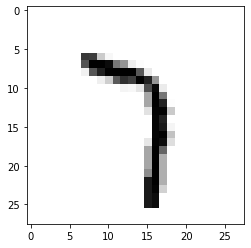

In [13]:
import matplotlib.pyplot as plt
image_index = 122
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())